In [227]:
#! pip install opendatasets --quiet

In [228]:
# import opendatasets as od 
# dataset_url = 'https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results'
# od.download(dataset_url)

In [229]:
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')

In [230]:
df= pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [231]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [232]:
df.shape

(271116, 15)

In [233]:
df = df[df['Season']=='Summer']

In [234]:
df.shape

(222552, 15)

In [235]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN


In [236]:
region_df.tail()

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [237]:
df = df.merge(region_df, on='NOC', how='left')    #merge region dataframe

In [238]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN
222551,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,Belarus,NaN


In [239]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [240]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [241]:
df.duplicated().sum()

1385

In [242]:
df.drop_duplicates(inplace=True)

In [243]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [244]:
#OHE- medal

df = pd.concat([df,pd.get_dummies(df['Medal'])], axis=1)

In [245]:
df.shape

(221167, 20)

In [246]:
df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,Russia,1220,974,994
2,Germany,1075,987,1064
3,UK,635,729,620
4,Italy,518,474,454
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


In [247]:
# in the above data wrong table we get
# so we need to remove duplicates - count only once


In [248]:
medal_tally = df.drop_duplicates(subset= ['Team','NOC', 'Games', 'Year','City','Sport','Event','Medal'] )

In [249]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [250]:
medal_tally['total'] =  medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [251]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [252]:
medal_tally.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   region  205 non-null    object
 1   Gold    205 non-null    int64 
 2   Silver  205 non-null    int64 
 3   Bronze  205 non-null    int64 
 4   total   205 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.1+ KB


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221167 entries, 0 to 222551
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     212137 non-null  float64
 4   Height  170667 non-null  float64
 5   Weight  168661 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   34077 non-null   object 
 15  region  220797 non-null  object 
 16  notes   4397 non-null    object 
 17  Bronze  221167 non-null  bool   
 18  Gold    221167 non-null  bool   
 19  Silver  221167 non-null  bool   
dtypes: bool(3), float64(3), int64(2), object(12)
memory u

In [254]:
years = df['Year'].unique().tolist()

In [255]:
years.sort()

In [256]:
years.insert(0,'Overall')

In [257]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [258]:
country = np.unique(df['region'].dropna().values).tolist()

In [259]:
country.sort()

In [260]:
country.insert(0,'Overall')

In [261]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [262]:
def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset= ['Team','NOC', 'Games', 'Year','City','Sport','Event','Medal'] )
    flag = 0
    
    if year == 'Overall' and country== 'Overall':
        temp_df = medal_df 
        
    if year == 'Overall' and country != 'Overall':
        flag=1
        temp_df = medal_df[medal_df['region'] == country]
        
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
        
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]
        
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    print(x)


In [263]:
fetch_medal_tally(df,year='Overall', country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [264]:
medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


In [265]:
medal_df[(medal_df['Year'] == 2016) & (medal_df['region'] == 'India')]

NameError: name 'medal_df' is not defined

### Overall Analysis
    - no of editions
    - no of cities
    - no od events/sports
    - no of athletes
    - participating nations

In [ ]:
df.sample()

In [ ]:
df['Year'].unique().shape[0] - 1

In [ ]:
df['City'].unique().shape

In [ ]:
df['Sport'].unique().shape

In [ ]:
df['Event'].unique().shape

In [ ]:
df['Name'].unique().shape

In [ ]:
df['region'].unique().shape

In [ ]:
editions = df['Year'].unique().shape[0] - 1
cities = df['City'].unique().shape[0]
sports = df['Sport'].unique().shape[0]
events = df['Event'].unique().shape[0]
athletes = df['Name'].unique().shape[0]
nations = df['region'].unique().shape[0]

In [ ]:
df.head()

### Graphs

In [ ]:
nations_over_time = df.drop_duplicates(['Year','region'])["Year"].value_counts().reset_index().sort_values('Year')

In [ ]:
nations_over_time.rename(columns = {'Year':'Editions','count':'No of Countries'}, inplace=True)

In [ ]:
nations_over_time

In [ ]:
# lineplot

import plotly.express as px
fig = px.line(nations_over_time, x = 'Editions',y='No of Countries')
fig.show()

In [ ]:
events_over_time = df.drop_duplicates(['Year','Event'])["Year"].value_counts().reset_index().sort_values('Year')

In [ ]:
events_over_time.rename(columns = {'Year':'Event','count':'No of Countries'}, inplace=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
x = df.drop_duplicates(['Year','Sport','Event'])

In [ ]:
plt.figure(figsize=(25, 25))

#pivot_table =  x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int')
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int')
, annot=True)   

In [ ]:
df.

In [ ]:
# successful athletes

def most_sucessful(df,Sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if Sport!= 'Overall':
        temp_df = temp_df[temp_df['Sport'] == Sport]
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,on = 'Name',how='left')[['Name','count','Sport','region']].drop_duplicates('Name')
    x.rename(columns = {'Name':'Name','count':'Medals'},inplace=True)
    return x

In [ ]:
most_sucessful(df,'Overall')

### Country Wise analysis

    * Country wise medal tally per year(line plot)
    * what contriies are good at heatmap
    * Most sucessful athletes top 10

In [ ]:
temp_df =  df.dropna(subset=['Medal'])
temp_df = temp_df.drop_duplicates(subset= ['Team','NOC', 'Games', 'Year','City','Sport','Event','Medal'] )

In [ ]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [ ]:
fig = px.line(final_df, x = 'Year',y='Medal')
fig.show()

In [ ]:
new_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0), annot=True)


In [ ]:
#country wise top 10 athletes
# successful athletes

def most_sucessful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region'] == country]
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,on = 'Name',how='left')[['Name','count','Sport']].drop_duplicates('Name')
    x.rename(columns = {'Name':'Name','count':'Medals'},inplace=True)
    return x


In [ ]:
most_sucessful(df,'USA')

# Athletes analysis

In [ ]:
import plotly.figure_factory as ff

In [ ]:
athletes_df = df.drop_duplicates(subset=['Name','region'])

In [135]:
x1 = athletes_df['Age'].dropna()
x2= athletes_df[athletes_df['Medal'] == 'Gold']['Age'].dropna()
x3= athletes_df[athletes_df['Medal'] == 'Silver']['Age'].dropna()
x4= athletes_df[athletes_df['Medal'] == 'Bronze']['Age'].dropna()

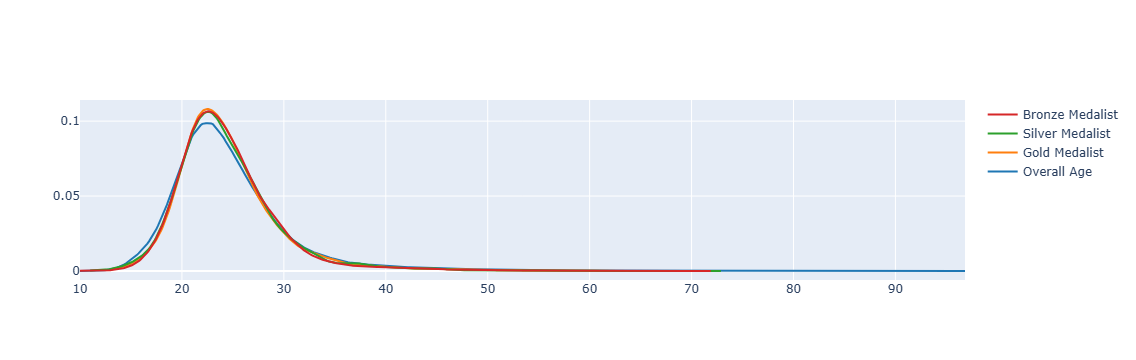

In [266]:
fig = ff.create_distplot([x1,x2,x3,x4], ['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'], show_hist=False,show_rug=False)
fig.show()

In [356]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics']

In [357]:
athletes_df = df.drop_duplicates(subset=['Name','region'])

In [358]:
x = []
names = []
# temp_df = df.dropna(subset=['Medal','Sport','Age'])

for sport in famous_sports:
    temp_df = athletes_df[athletes_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    names.append(sport)

In [351]:
names

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

In [353]:
temp_df.reset_index()

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,...,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver


In [354]:
index_to_remove = 176005

# Check if the index exists in the DataFrame
if index_to_remove in df.index:
    df = df.drop(index_to_remove)
else:
    print(f"Index {index_to_remove} not found in the DataFrame")

Index 176005 not found in the DataFrame


In [355]:
temp_df[temp_df == ""]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver


In [359]:
fig = ff.create_distplot(x,names,show_hist=True,show_rug=False)

ValueError: min() arg is an empty sequence

In [292]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         6151
Height     29529
Weight     30144
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region       190
notes     114601
Bronze         0
Gold           0
Silver         0
dtype: int64

In [295]:
# height and weights
athletes_df['Medal'].fillna('No Medal', inplace=True)


<Axes: xlabel='Height', ylabel='Weight'>

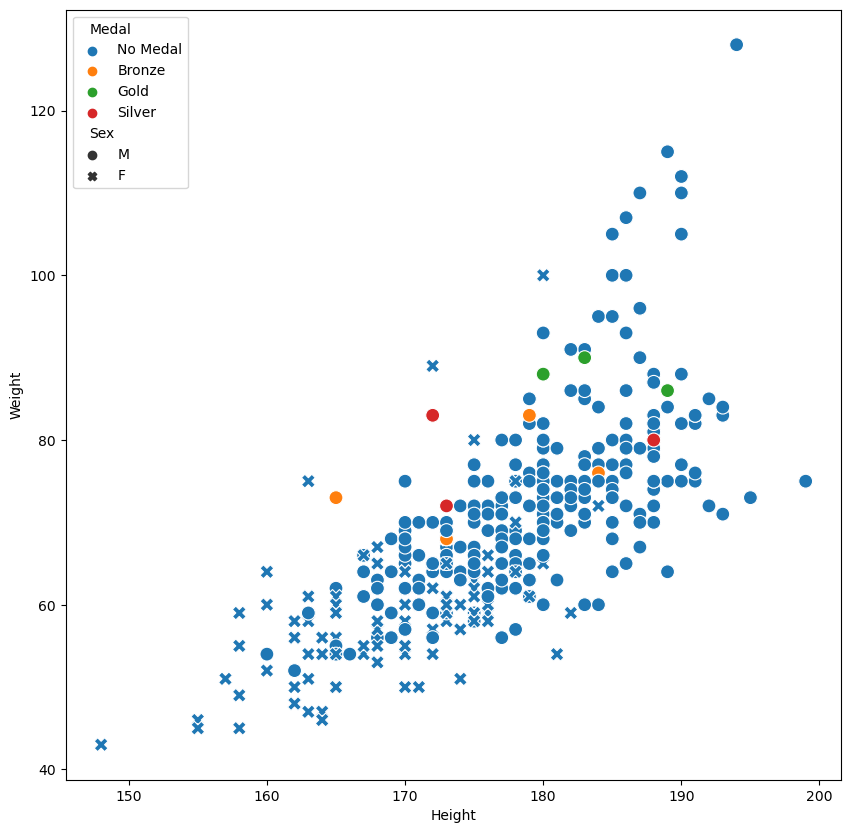

In [313]:
plt.figure(figsize=(10,10))
temp_df = athletes_df[athletes_df['Sport'] == 'Athletics']
sns.scatterplot(data = temp_df,x=temp_df['Height'], y=temp_df['Weight'],hue=temp_df['Medal'], style=temp_df['Sex'],s=100)

In [299]:
men = athletes_df[athletes_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athletes_df[athletes_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [310]:
final = men.merge(women, on='Year',how='left')
final.rename(columns = {'Name_x':'Male','Name_y':'Female'},inplace=True)

In [311]:
final.fillna(0,inplace=True)

In [312]:
fig = px.line(final, x = 'Year', y=['Male','Female'])

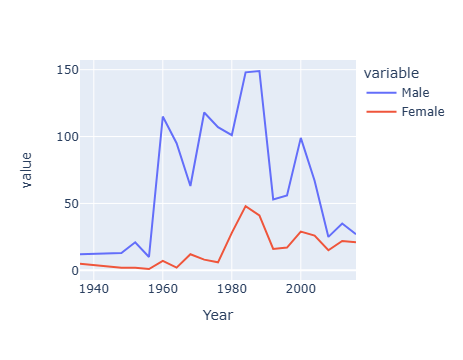

In [306]:
fig.show()